In [1]:
#EDA helps us understand the structure, trends, and patterns in the data before performing deeper analysis. 
#Below is the step-by-step approach for r/travel

#I took unique posts from r/travel reddit and saved in csv file now performing EDA using csv file


In [4]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
#saving csv data to dataframe
travel_df = pd.read_csv('./travel_subreddit_cleaned_posts.csv')


In [6]:
#sample data analysis
travel_df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit
0,1jdbb7p,1.742214e+09,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel
1,1jczvtw,1.742171e+09,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel
2,1jdni63,1.742245e+09,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel
3,1jdg7d8,1.742227e+09,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel
4,1jdv8mu,1.742266e+09,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel


In [7]:
travel_df.shape

(1103, 8)

In [8]:
#no null data for 1002 records
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1103 non-null   object 
 1   created_utc   1103 non-null   float64
 2   title         1103 non-null   object 
 3   author        1059 non-null   object 
 4   selftext      493 non-null    object 
 5   num_comments  1103 non-null   int64  
 6   score         1103 non-null   int64  
 7   subreddit     1103 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 69.1+ KB


In [9]:
travel_df.isnull().sum()

id                0
created_utc       0
title             0
author           44
selftext        610
num_comments      0
score             0
subreddit         0
dtype: int64

In [10]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1103 non-null   object 
 1   created_utc   1103 non-null   float64
 2   title         1103 non-null   object 
 3   author        1059 non-null   object 
 4   selftext      493 non-null    object 
 5   num_comments  1103 non-null   int64  
 6   score         1103 non-null   int64  
 7   subreddit     1103 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 69.1+ KB


In [11]:
travel_df['combined_text'] = travel_df['title'] + ' ' + travel_df['selftext'].fillna('')

# display sample data
travel_df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text
0,1jdbb7p,1.742214e+09,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ..."
1,1jczvtw,1.742171e+09,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...
2,1jdni63,1.742245e+09,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...
3,1jdg7d8,1.742227e+09,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...
4,1jdv8mu,1.742266e+09,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...


In [12]:
#created_utc to readable format conversion
travel_df['created_utc'] = pd.to_datetime(travel_df['created_utc'], unit='s')
travel_df[['created_utc']].head()
travel_df['year'] = travel_df['created_utc'].dt.year
travel_df['month'] = travel_df['created_utc'].dt.month
travel_df['day'] = travel_df['created_utc'].dt.day
travel_df['hour'] = travel_df['created_utc'].dt.hour
travel_df['day_of_week'] = travel_df['created_utc'].dt.day_name()
travel_df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ...",2025,3,17,12,Monday
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...,2025,3,17,0,Monday
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...,2025,3,17,20,Monday
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...,2025,3,17,16,Monday
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...,2025,3,18,2,Tuesday


In [13]:
#checking duplicate posts
travel_df.duplicated().sum()

0

In [14]:
#checking null values
travel_df.isnull().sum()

id                 0
created_utc        0
title              0
author            44
selftext         610
num_comments       0
score              0
subreddit          0
combined_text      0
year               0
month              0
day                0
hour               0
day_of_week        0
dtype: int64

In [15]:
#summary statistics
travel_df.describe()

,created_utc,num_comments,score,year,month,day,hour
count,1103,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,2022-01-31 19:22:20.615593728,147.330916,5161.147779,2021.728015,4.841342,14.808704,13.084316
min,2016-03-01 14:27:34,0.000000,0.000000,2016.000000,1.000000,1.000000,0.000000
25%,2019-01-15 02:30:03,8.000000,1.000000,2019.000000,3.000000,10.000000,9.000000
50%,2022-05-02 15:14:34,100.000000,5749.000000,2022.000000,3.000000,14.000000,14.000000
75%,2025-03-12 16:32:45.500000,181.000000,7488.500000,2025.000000,7.000000,18.000000,17.000000
max,2025-03-18 03:37:34,3866.000000,96790.000000,2025.000000,12.000000,31.000000,23.000000
std,NaN,270.426332,6202.832349,3.144783,3.086067,7.175062,5.805776


In [16]:
# active authors
travel_df['author'].value_counts().head(10)

author
ani_svnit             9
uspn                  6
I_AM_STILL_A_IDIOT    6
unanatkumot           4
bpg5075               3
caliform              3
dcdead                3
yezoob                3
zennie4               3
BeardedGlass          3
Name: count, dtype: int64

In [17]:
# Check for duplicate titles
travel_df['title'].value_counts().head(10)

title
Travelling to USA for the first time and border control question.                                        2
We've got a free car to travel the USA, we'll be there for a month are we being stupid with our plan?    1
Sri Lanka best Safari in March and Price                                                                 1
Day trip out of Paris advice                                                                             1
Uber request?                                                                                            1
Medication in a carry on                                                                                 1
Historic and picturesque town in east Spain?                                                             1
To travel or not to travel (yet another spooked visa holder looking for perspective)                     1
Medellin or Santa Marta (early August)                                                                   1
European Weekend break for coup

In [18]:
# Checks for outliers in upvotes and comments using statistical measure percentile
travel_df[['score', 'num_comments']].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

,score,num_comments
0.25,1.00,8.00
0.50,5749.00,100.00
0.75,7488.50,181.00
0.95,14478.90,462.50
0.99,24816.46,1141.44


In [19]:
#calculating the length of the self text to understand the story behind the self text
travel_df['text_length'] = travel_df['combined_text'].apply(lambda x: len(x.split()))

In [20]:
travel_df.shape

(1103, 15)

In [21]:
# Correlation analysis for numerical features
travel_df[['score', 'num_comments', 'text_length']].corr()

,score,num_comments,text_length
score,1.000000,0.507378,-0.255345
num_comments,0.507378,1.000000,-0.018505
text_length,-0.255345,-0.018505,1.000000


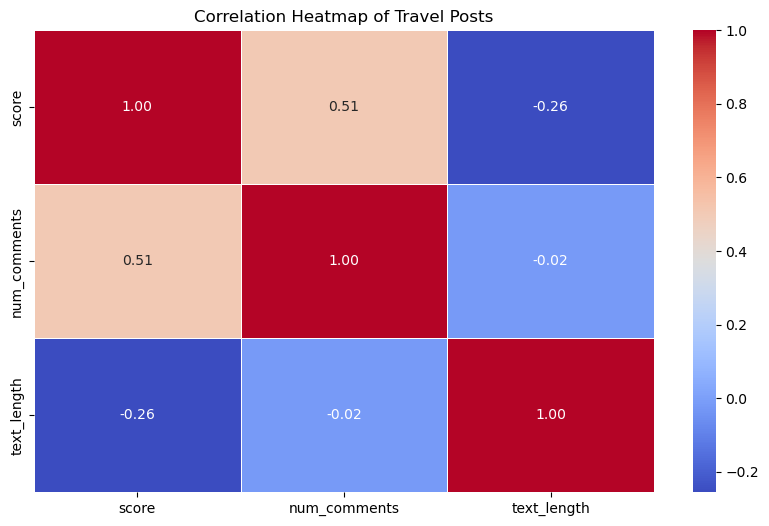

In [22]:
# Compute the correlation matrix using heat map
corr_matrix = travel_df[['score', 'num_comments', 'text_length']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Travel Posts")
plt.show()


In [23]:
#score and num_comments are positively correlated
#text length and score are negatively correlated

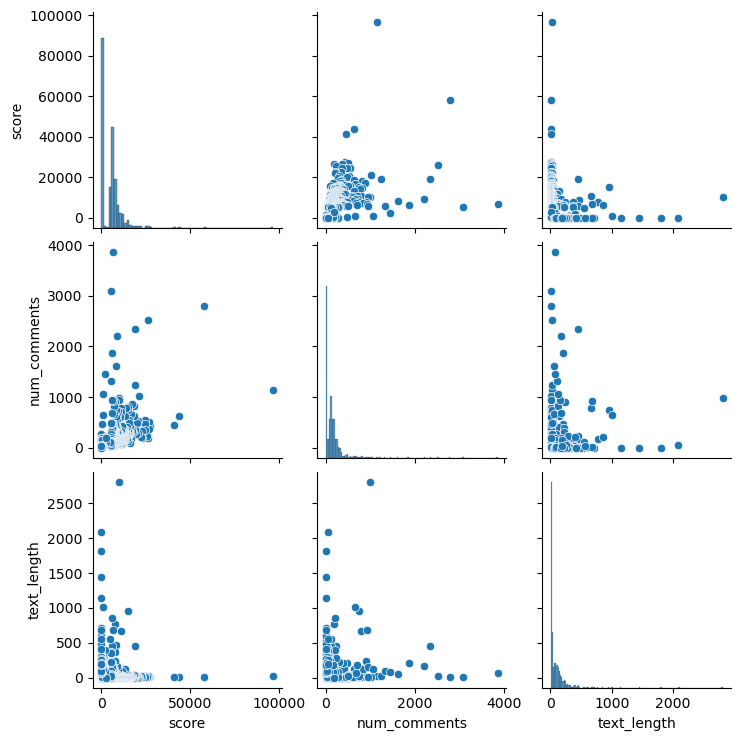

In [24]:
#pair plots
sns.pairplot(travel_df[['score', 'num_comments', 'text_length']])
plt.show()

In [25]:
#summary statistics for numerical features
travel_df[['text_length', 'score', 'num_comments']].describe()

,text_length,score,num_comments
count,1103.000000,1103.000000,1103.000000
mean,86.155938,5161.147779,147.330916
std,168.635194,6202.832349,270.426332
min,1.000000,0.000000,0.000000
25%,11.000000,1.000000,8.000000
50%,25.000000,5749.000000,100.000000
75%,112.000000,7488.500000,181.000000
max,2805.000000,96790.000000,3866.000000


In [26]:
#summary statistics of object features
travel_df.describe(include='object')

,id,title,author,selftext,subreddit,combined_text,day_of_week
count,1103,1103,1059,493,1103,1103,1103
unique,1103,1102,997,492,1,1102,7
top,1jdbb7p,Travelling to USA for the first time and borde...,ani_svnit,Hi so I’m travelling to the USA for the first ...,travel,Travelling to USA for the first time and borde...,Monday
freq,1,2,9,2,1103,2,229


In [27]:
# Display top 5 longest posts
travel_df[['title', 'text_length', 'score']].sort_values(by='text_length', ascending=False).head()

,title,text_length,score
155,Lost in the Amazon jungle in Peru thanks to an...,2805,10175
749,What are your personal rule sets when traveling ?,2086,11
836,Detailed China Trip Report - 8 Days in Shangha...,1809,3
666,Turkey itinerary check - Izmir/Selcuk/Ephesus/...,1447,1
1092,Our Trip to Spain and Cote d'azur,1145,8


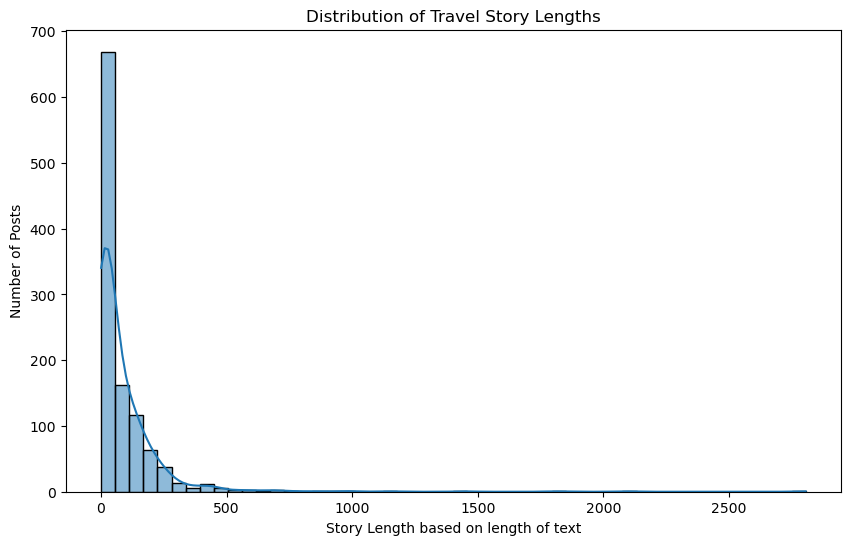

In [28]:
#distribution of story length
plt.figure(figsize=(10,6))
sns.histplot(travel_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Travel Story Lengths')
plt.xlabel('Story Length based on length of text')
plt.ylabel('Number of Posts')
plt.show()

In [29]:
#info of dataframe
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1103 non-null   object        
 1   created_utc    1103 non-null   datetime64[ns]
 2   title          1103 non-null   object        
 3   author         1059 non-null   object        
 4   selftext       493 non-null    object        
 5   num_comments   1103 non-null   int64         
 6   score          1103 non-null   int64         
 7   subreddit      1103 non-null   object        
 8   combined_text  1103 non-null   object        
 9   year           1103 non-null   int32         
 10  month          1103 non-null   int32         
 11  day            1103 non-null   int32         
 12  hour           1103 non-null   int32         
 13  day_of_week    1103 non-null   object        
 14  text_length    1103 non-null   int64         
dtypes: datetime64[ns](1),

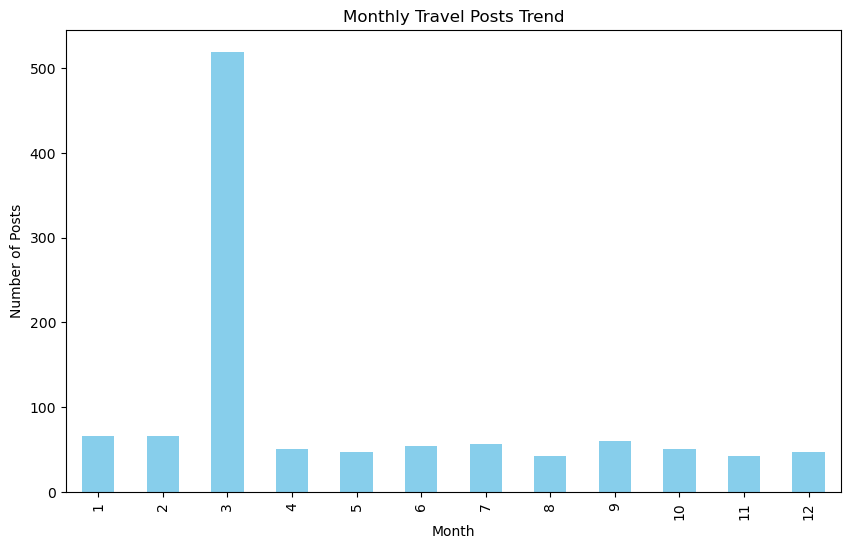

In [30]:
# Group posts by month and count
monthly_trend = travel_df.groupby('month').size()
# Plot the trend
plt.figure(figsize=(10,6))
monthly_trend.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Monthly Travel Posts Trend')
plt.show()



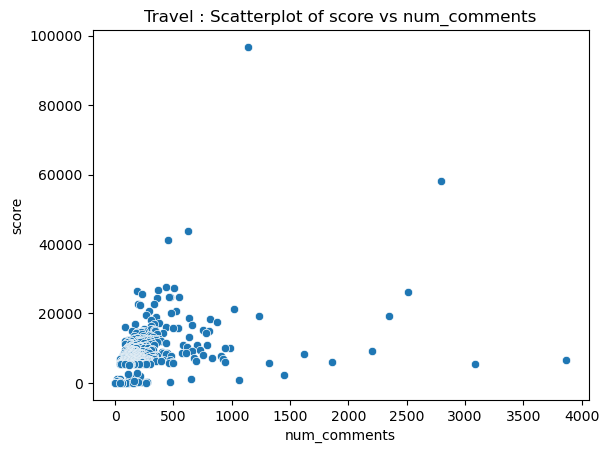

In [31]:
#plottings
sns.scatterplot(data=travel_df, x='num_comments', y='score')
plt.title('Travel : Scatterplot of score vs num_comments');

In [32]:
#display top 10 authors from travelhacks reddit dataframe
def top_20_authors(travel_df, value):
    top_authors = []
    for i in range(value):
        top_authors.append(travel_df.author.value_counts().index[i])
    return top_authors


In [33]:
top_travel_authors = top_20_authors(travel_df, 20)
top_travel_authors

['ani_svnit',
 'uspn',
 'I_AM_STILL_A_IDIOT',
 'unanatkumot',
 'bpg5075',
 'caliform',
 'dcdead',
 'yezoob',
 'zennie4',
 'BeardedGlass',
 'Speech500',
 'upsidedownbat',
 'dhol604',
 'bubu_qubu',
 'NomadicalMan',
 'EpicAdriann',
 'valarmothballs',
 'jbanks94',
 'Expert_Storm1269',
 'inspiredtotaste']

In [34]:
top_authors_travel_df = travel_df[travel_df.author.isin(top_20_authors(travel_df,20))]
top_authors_travel_df.sort_values(by = 'score', ascending = False)[['author', 'num_comments', 'score', 'combined_text']]

,author,num_comments,score,combined_text
32,uspn,475,24852,If you're on a road trip in California the nex...
35,EpicAdriann,358,24570,The most incredible border between Vietnam & C...
38,I_AM_STILL_A_IDIOT,211,22322,"We stayed overnight on Miyajima, a little shri..."
52,I_AM_STILL_A_IDIOT,331,17102,"This weekend, it snowed for the first time in ..."
67,ani_svnit,234,15038,A quintessentially Edinburgh picture with my 2...
...,...,...,...,...
603,zennie4,261,5621,Spent two weeks in Socotra Island (Yemen) rece...
604,unanatkumot,126,5614,"The ruins of El Badi Palace in Marrakech, Morr..."
656,valarmothballs,90,5374,"I was forced to staycation this year, turns ou..."
835,Expert_Storm1269,3,6,Italy in Dec '25 Reference to my [previous pos...


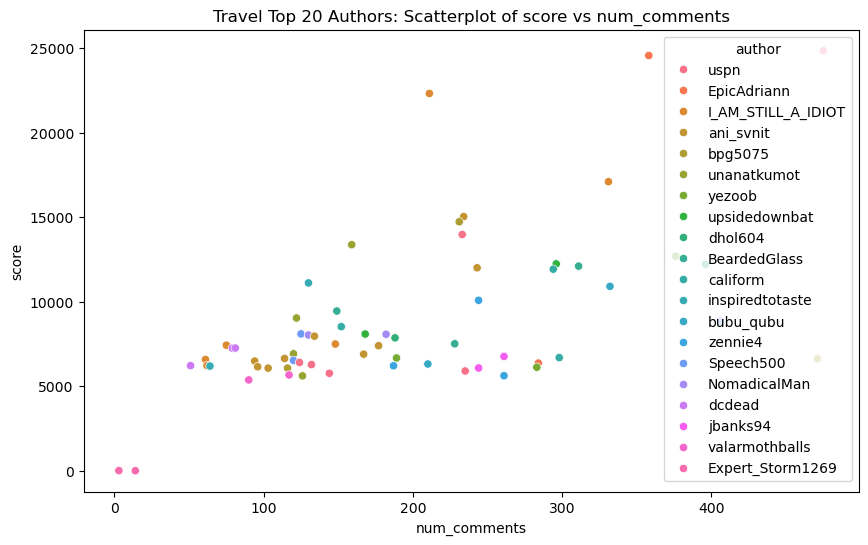

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=top_authors_travel_df, x='num_comments', y='score',hue='author')
plt.title('Travel Top 20 Authors: Scatterplot of score vs num_comments');

In [36]:
travel_df.head()


,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week,text_length
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ...",2025,3,17,12,Monday,209
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...,2025,3,17,0,Monday,317
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...,2025,3,17,20,Monday,156
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...,2025,3,17,16,Monday,154
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...,2025,3,18,2,Tuesday,375


In [37]:

travel_df['combined_word_count'] = travel_df['combined_text'].map(lambda x: len(x.split()))

In [38]:
travel_df['combined_word_count'].describe()


count    1103.000000
mean       86.155938
std       168.635194
min         1.000000
25%        11.000000
50%        25.000000
75%       112.000000
max      2805.000000
Name: combined_word_count, dtype: float64

In [128]:
travel_df.columns

Index(['id', 'created_utc', 'title', 'author', 'selftext', 'num_comments',
       'score', 'subreddit', 'combined_text', 'year', 'month', 'day', 'hour',
       'day_of_week', 'text_length', 'combined_word_count'],
      dtype='object')

In [129]:
travel_df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week,text_length,combined_word_count
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ...",2025,3,17,12,Monday,209,209
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...,2025,3,17,0,Monday,317,317
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...,2025,3,17,20,Monday,156,156
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...,2025,3,17,16,Monday,154,154
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...,2025,3,18,2,Tuesday,375,375


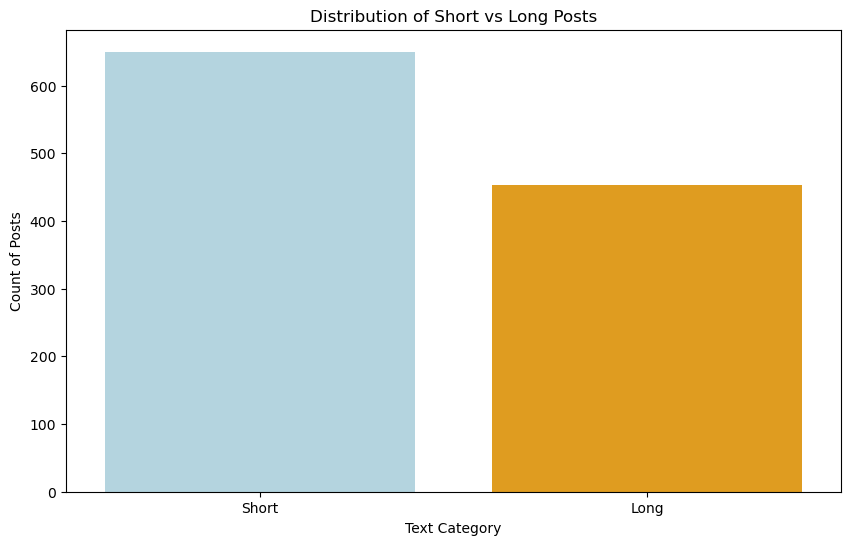

In [130]:
#short vs long posts
#featured text_category for analyzing engagement
travel_df['text_category'] = travel_df['combined_word_count'].apply(lambda x: 'Short' if x <= 50 else 'Long')
text_count = travel_df['text_category'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=text_count.index, y=text_count.values, palette=['lightblue', 'orange'])
plt.xlabel('Text Category')
plt.ylabel('Count of Posts')
plt.title('Distribution of Short vs Long Posts')
plt.show()


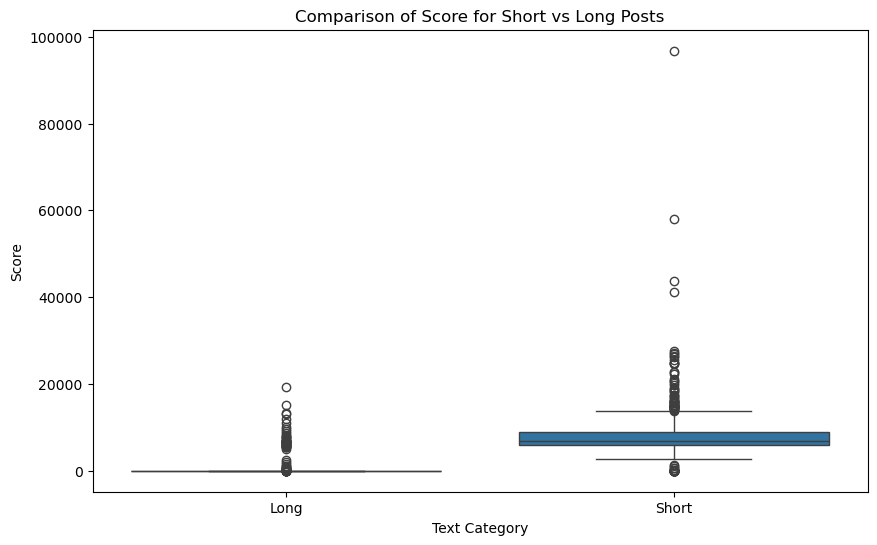

In [131]:
#score vs text_category
plt.figure(figsize=(10,6))

sns.boxplot(x='text_category', y='score', data=travel_df)
plt.xlabel('Text Category')
plt.ylabel('Score')
plt.title('Comparison of Score for Short vs Long Posts')
plt.show()

In [132]:

travel_df[['combined_word_count', 'score', 'num_comments']].corr()




,combined_word_count,score,num_comments
combined_word_count,1.000000,-0.255345,-0.018505
score,-0.255345,1.000000,0.507378
num_comments,-0.018505,0.507378,1.000000


In [133]:
travel_df.groupby('text_category')[['score', 'num_comments']].mean()

,score,num_comments
text_category,,
Long,731.269316,79.997792
Short,8248.432308,194.256923


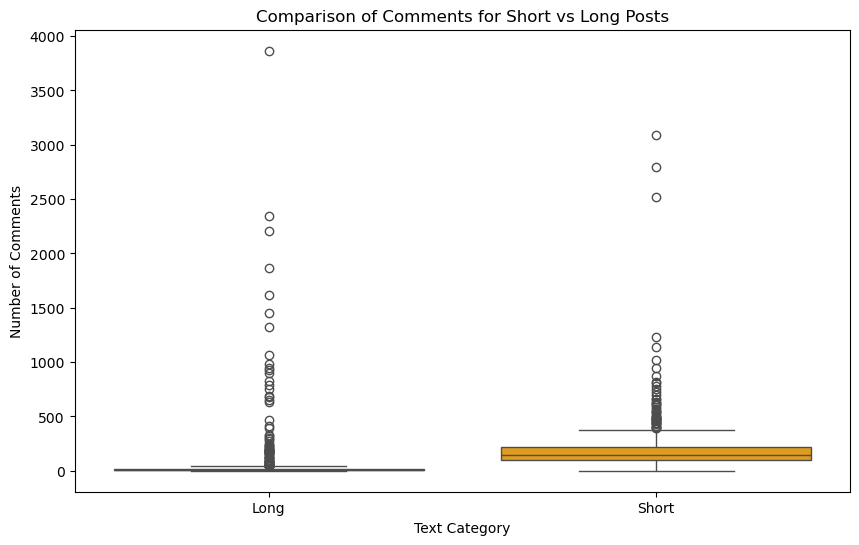

In [134]:
plt.figure(figsize=(10,6))
sns.boxplot(x='text_category', y='num_comments', data=travel_df, palette=['lightblue', 'orange'])
plt.xlabel('Text Category')
plt.ylabel('Number of Comments')
plt.title('Comparison of Comments for Short vs Long Posts')
plt.show()

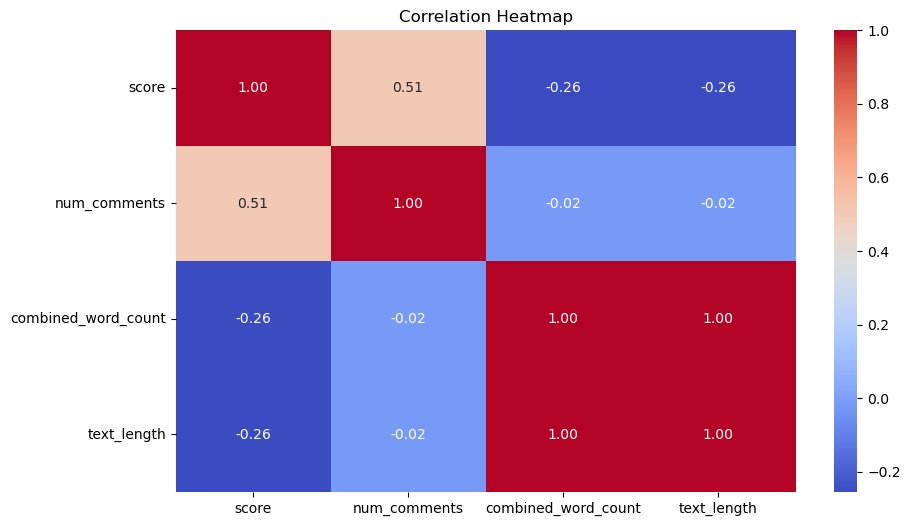

In [135]:
plt.figure(figsize=(10,6))
sns.heatmap(travel_df[['score', 'num_comments', 'combined_word_count', 'text_length']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

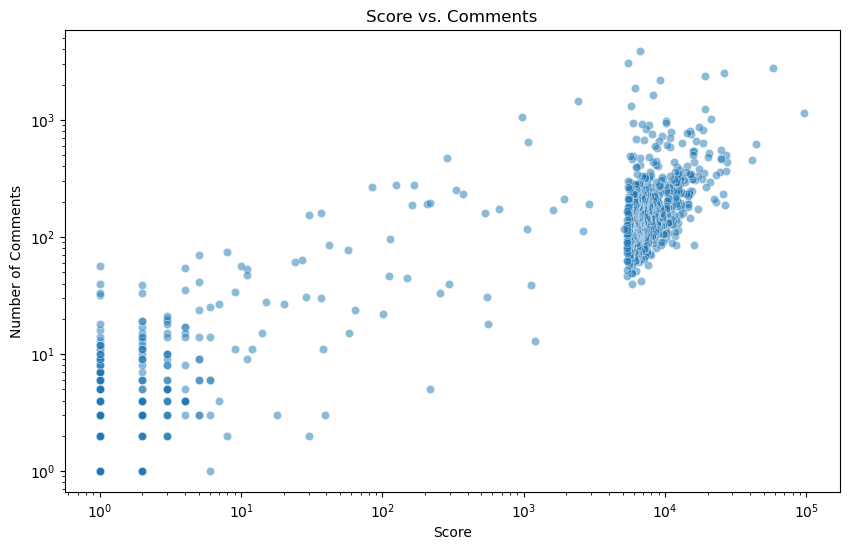

In [136]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=travel_df, x='score', y='num_comments', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.title('Score vs. Comments')
plt.xscale('log')
plt.yscale('log')
plt.show()

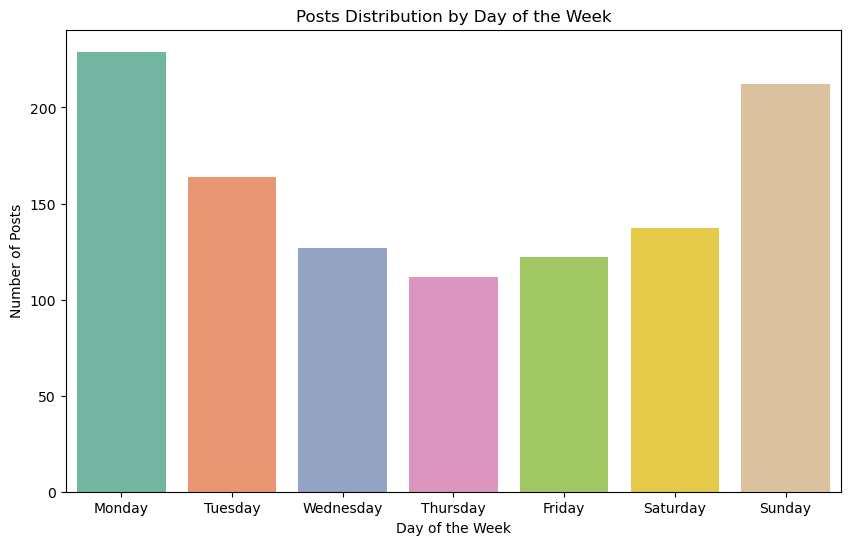

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(data=travel_df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.title('Posts Distribution by Day of the Week')
plt.show()

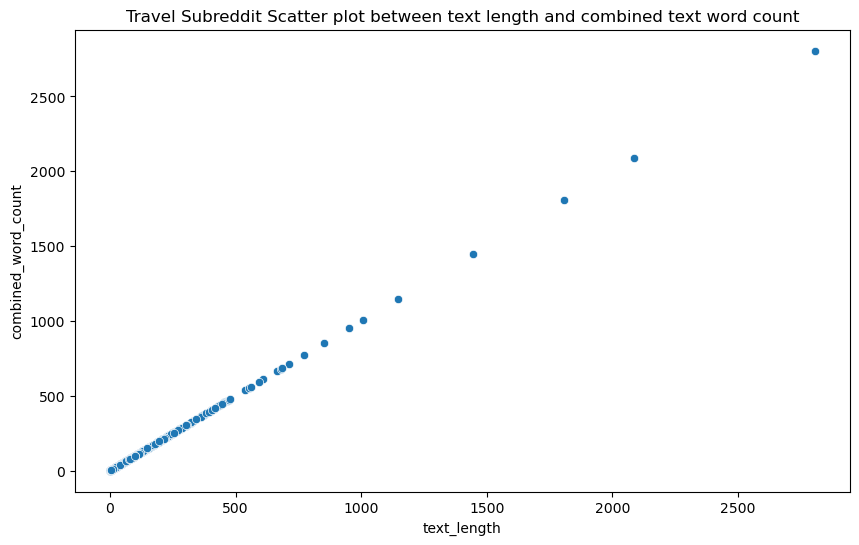

In [138]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=travel_df, x='text_length', y='combined_word_count')
plt.title('Travel Subreddit Scatter plot between text length and combined text word count');

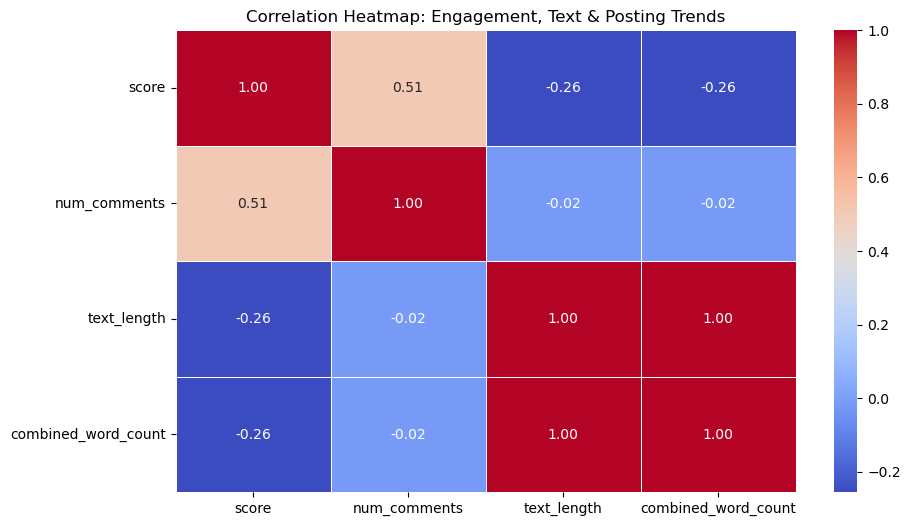

In [139]:
corr_features = ['score', 'num_comments', 'text_length', 'combined_word_count']
corr_matrix = travel_df[corr_features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Engagement, Text & Posting Trends')
plt.show()


In [140]:
travel_df

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,month,day,hour,day_of_week,text_length,combined_word_count,text_category
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ...",2025,3,17,12,Monday,209,209,Long
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...,2025,3,17,0,Monday,317,317,Long
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...,2025,3,17,20,Monday,156,156,Long
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...,2025,3,17,16,Monday,154,154,Long
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...,2025,3,18,2,Tuesday,375,375,Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1jcr7ol,2025-03-16 17:50:42,So what is up with Spirit Airlines? Are they g...,Free_Answered,I had never heard of Spirit until a few years ...,12,0,travel,So what is up with Spirit Airlines? Are they g...,2025,3,16,17,Sunday,149,149,Long
1099,1jbn9ok,2025-03-15 04:33:50,NY travelers: do you have any Midtown hotels y...,CrazyGoodAlways,Like title states looking to stay in Midtown. ...,6,0,travel,NY travelers: do you have any Midtown hotels y...,2025,3,15,4,Saturday,79,79,Long
1100,1j8l41g,2025-03-11 07:14:20,What are your favorite towns in Himachal Prade...,Goodnight_April,I will be spending a couple of months in Himac...,18,3,travel,What are your favorite towns in Himachal Prade...,2025,3,11,7,Tuesday,98,98,Long
1101,1j8aqck,2025-03-10 22:00:38,Brazil itinerary question,IsraeliGigaChad,"Hey, I'm currently staying in Brazil in buzios...",1,1,travel,"Brazil itinerary question Hey, I'm currently s...",2025,3,10,22,Monday,178,178,Long


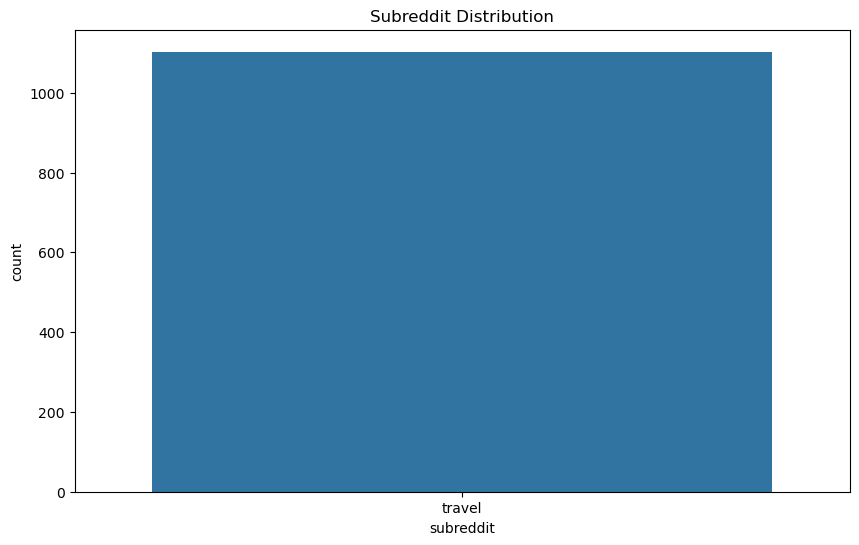

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subreddit', data=travel_df)
plt.title('Subreddit Distribution')
plt.show()

In [142]:
#preprocessing steps
#define stopwords and lemmatizer
#clean the text->converted text to lower case and removed punctuation, special characters and numbers
#tokenization->splits cleaned text to individual words->Used tokenization for sentimental analysis
#remove stopwords->filters out words unwanted words(the,is,and)
#Lemmatization->converts words jumping,jumps,jumped->jump
#bigrams->words into list of bigram phrases
#trigrams->words into list of trigram phrases->used bigrams for NLP and text analysis
#created new columns to store the cleaned_text,tokentized_text,bigrams and trigrams

In [143]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return "" 
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    return text.strip()

def preprocess_text(text):
    text = clean_text(text) 
    tokens = word_tokenize(text)  
    tokens = [word for word in tokens if word not in stop_words]  
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  
    return tokens

def generate_ngrams(tokens, n):
    return [" ".join(gram) for gram in ngrams(tokens, n)]

travel_df['cleaned_text'] = travel_df['combined_text'].apply(clean_text) 
travel_df['tokenized_text'] = travel_df['cleaned_text'].apply(preprocess_text)  
travel_df['bigrams'] = travel_df['tokenized_text'].apply(lambda x: generate_ngrams(x, 2))  
travel_df['trigrams'] = travel_df['tokenized_text'].apply(lambda x: generate_ngrams(x, 3))  
travel_df.head()



,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day,hour,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ...",2025,...,17,12,Monday,209,209,Long,weve got a free car to travel the usa well be ...,"[weve, got, free, car, travel, usa, well, mont...","[weve got, got free, free car, car travel, tra...","[weve got free, got free car, free car travel,..."
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...,2025,...,17,0,Monday,317,317,Long,traveling for work as extremely morbidly obese...,"[traveling, work, extremely, morbidly, obese, ...","[traveling work, work extremely, extremely mor...","[traveling work extremely, work extremely morb..."
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...,2025,...,17,20,Monday,156,156,Long,my experience getting tsa precheck usa maybe n...,"[experience, getting, tsa, precheck, usa, mayb...","[experience getting, getting tsa, tsa precheck...","[experience getting tsa, getting tsa precheck,..."
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...,2025,...,17,16,Monday,154,154,Long,what are some largecapital cities that are act...,"[largecapital, city, actually, quite, reflecti...","[largecapital city, city actually, actually qu...","[largecapital city actually, city actually qui..."
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...,2025,...,18,2,Tuesday,375,375,Long,lost carryon suitcase waiting for flight at ch...,"[lost, carryon, suitcase, waiting, flight, chi...","[lost carryon, carryon suitcase, suitcase wait...","[lost carryon suitcase, carryon suitcase waiti..."


In [144]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1103 non-null   object        
 1   created_utc          1103 non-null   datetime64[ns]
 2   title                1103 non-null   object        
 3   author               1059 non-null   object        
 4   selftext             493 non-null    object        
 5   num_comments         1103 non-null   int64         
 6   score                1103 non-null   int64         
 7   subreddit            1103 non-null   object        
 8   combined_text        1103 non-null   object        
 9   year                 1103 non-null   int32         
 10  month                1103 non-null   int32         
 11  day                  1103 non-null   int32         
 12  hour                 1103 non-null   int32         
 13  day_of_week          1103 non-nul

In [145]:
travel_df['subreddit'].unique()

array(['travel'], dtype=object)

In [146]:
travel_df.to_csv('travel_preprocessed_data.csv', index=False)

In [147]:
travel_df.head()

,id,created_utc,title,author,selftext,num_comments,score,subreddit,combined_text,year,...,day,hour,day_of_week,text_length,combined_word_count,text_category,cleaned_text,tokenized_text,bigrams,trigrams
0,1jdbb7p,2025-03-17 12:21:05,"We've got a free car to travel the USA, we'll ...",Impossible-Abalone62,Hello! I'm travelling to USA from Australia wi...,470,288,travel,"We've got a free car to travel the USA, we'll ...",2025,...,17,12,Monday,209,209,Long,weve got a free car to travel the usa well be ...,"[weve, got, free, car, travel, usa, well, mont...","[weve got, got free, free car, car travel, tra...","[weve got free, got free car, free car travel,..."
1,1jczvtw,2025-03-17 00:16:57,Traveling for Work as Extremely Morbidly Obese,swindeo,Required to take a cross-country flight for ne...,170,1612,travel,Traveling for Work as Extremely Morbidly Obese...,2025,...,17,0,Monday,317,317,Long,traveling for work as extremely morbidly obese...,"[traveling, work, extremely, morbidly, obese, ...","[traveling work, work extremely, extremely mor...","[traveling work extremely, work extremely morb..."
2,1jdni63,2025-03-17 20:53:30,My experience getting TSA precheck (USA). Mayb...,notafraidtolearn,I applied online for TSA precheck and then wen...,31,29,travel,My experience getting TSA precheck (USA). Mayb...,2025,...,17,20,Monday,156,156,Long,my experience getting tsa precheck usa maybe n...,"[experience, getting, tsa, precheck, usa, mayb...","[experience getting, getting tsa, tsa precheck...","[experience getting tsa, getting tsa precheck,..."
3,1jdg7d8,2025-03-17 16:02:21,What are some large/capital cities that are ac...,ExcitingNeck8226,I'm sure we all know that when you travel to t...,78,57,travel,What are some large/capital cities that are ac...,2025,...,17,16,Monday,154,154,Long,what are some largecapital cities that are act...,"[largecapital, city, actually, quite, reflecti...","[largecapital city, city actually, actually qu...","[largecapital city actually, city actually qui..."
4,1jdv8mu,2025-03-18 02:49:04,Lost carry-on suitcase waiting for flight at C...,AmbitiousLand2587,So like the title says I was flying from Chica...,27,7,travel,Lost carry-on suitcase waiting for flight at C...,2025,...,18,2,Tuesday,375,375,Long,lost carryon suitcase waiting for flight at ch...,"[lost, carryon, suitcase, waiting, flight, chi...","[lost carryon, carryon suitcase, suitcase wait...","[lost carryon suitcase, carryon suitcase waiti..."


In [148]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1103 non-null   object        
 1   created_utc          1103 non-null   datetime64[ns]
 2   title                1103 non-null   object        
 3   author               1059 non-null   object        
 4   selftext             493 non-null    object        
 5   num_comments         1103 non-null   int64         
 6   score                1103 non-null   int64         
 7   subreddit            1103 non-null   object        
 8   combined_text        1103 non-null   object        
 9   year                 1103 non-null   int32         
 10  month                1103 non-null   int32         
 11  day                  1103 non-null   int32         
 12  hour                 1103 non-null   int32         
 13  day_of_week          1103 non-nul